In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [15]:
test_series  = pd.read_parquet("/DataKaggle/SleepStates/test_series.parquet")
train_series = pd.read_parquet("/DataKaggle/SleepStates/train_series.parquet")
train_events = pd.read_csv("/DataKaggle/SleepStates/train_events.csv")

In [16]:
def isolate_individuals(train_events, train_series, nth = 0, days="all"):
    """
    Function to isolate patient specific information.
    Parameters
    ----------
    train_events:
        dtype: pd.DataFrame()
        pandas df of train events
    train_series:
        dtype: pd.DataFrame()
        pandas df of train series
    nth:
        dtype: int
        which patient information is desired based on index
    days:
        dtype: int or string
        number of days to return for patient, if 'all' then 
        it will return all days
    """
    #unique ids
    ids = train_series.series_id.unique()
    
    #grab individual
    p1  = train_series[train_series.series_id == ids[nth]]
    #drop nans
    p1e = train_events[train_events.series_id == ids[nth]].dropna()
    
    #dates for individual
    dates = p1.timestamp.str.split("T").str[0].unique()
    
    #isolate data for given periods
    data = []
    events = []
    if days == "all":
        days = len(dates)
    for day in range(days):
        p1_info   = p1[p1.timestamp.str.startswith(dates[day])].reset_index(drop=True)
        p1_events = p1e[p1e.timestamp.str.startswith(dates[day])].reset_index(drop=True)
        data.append(p1_info)
        events.append(p1_events)
        
    df = pd.concat(data).reset_index(drop=True)
    dfe = pd.concat(events).reset_index(drop=True)
    
    return df, dfe

In [17]:
df, dfe = isolate_individuals(train_events, train_series, nth = 0, days="all")

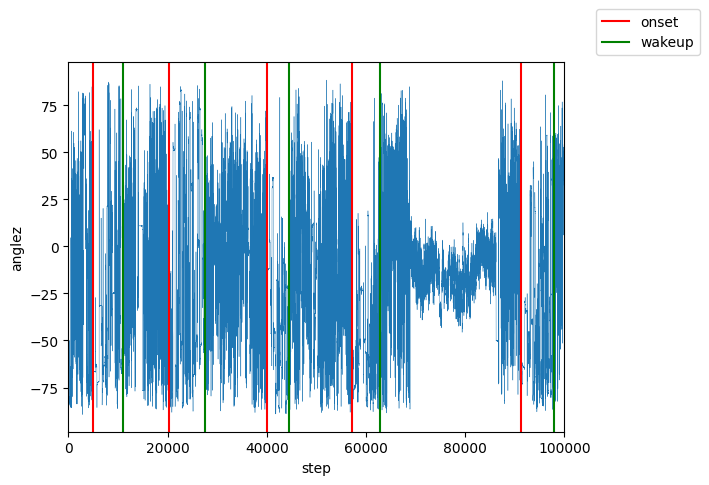

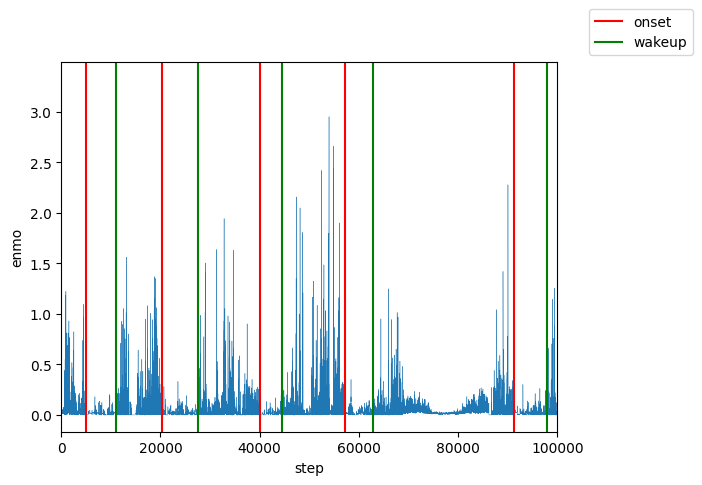

In [18]:
##desired range
step_range = [0,100000]

#plot anglez
plt.plot(df.step, df.anglez, lw=0.3)
for i in range(len(dfe)):
    if dfe.iloc[i].event == "onset":
        plt.axvline(dfe.iloc[i].step, color = "red", label = "onset")
    else:
        plt.axvline(dfe.iloc[i].step, color = "green", label = "wakeup")
plt.xlabel("step")
plt.ylabel("anglez")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0))
plt.xlim(step_range[0], step_range[1])
plt.show()

#plot enmo
plt.plot(df.step, df.enmo, lw=0.3)
for i in range(len(dfe)):
    if dfe.iloc[i].event == "onset":
        plt.axvline(dfe.iloc[i].step, color = "red", label = "onset")
    else:
        plt.axvline(dfe.iloc[i].step, color = "green", label = "wakeup")
plt.xlabel("step")
plt.ylabel("enmo")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0))
plt.xlim(step_range[0], step_range[1])
plt.show()

In [22]:
def isolate_individuals(train_events, train_series, nth = 0, days="all"):
    """
    Function to isolate patient specific information.
    Parameters
    ----------
    train_events:
        dtype: pd.DataFrame()
        pandas df of train events
    train_series:
        dtype: pd.DataFrame()
        pandas df of train series
    nth:
        dtype: int
        which patient information is desired based on index
    days:
        dtype: int or string
        number of days to return for patient, if 'all' then 
        it will return all days
    """
    #unique ids
    ids = train_series.series_id.unique()
    
    #grab individual
    p1  = train_series[train_series.series_id == ids[nth]]
    #drop nans
    p1e = train_events[train_events.series_id == ids[nth]].dropna()
    
    #dates for individual
    dates = p1.timestamp.str.split("T").str[0].unique()
    
    #isolate data for given periods
    data = []
    events = []
    if days == "all":
        days = len(dates)
    for day in range(days):
        p1_info   = p1[p1.timestamp.str.startswith(dates[day])].reset_index(drop=True)
        p1_events = p1e[p1e.timestamp.str.startswith(dates[day])].reset_index(drop=True)
        data.append(p1_info)
        events.append(p1_events)
        
    df = pd.concat(data).reset_index(drop=True)
    dfe = pd.concat(events).reset_index(drop=True)
    
    return df, dfe

In [23]:
df, dfe = isolate_individuals(train_events, train_series, nth = 0, days="all")

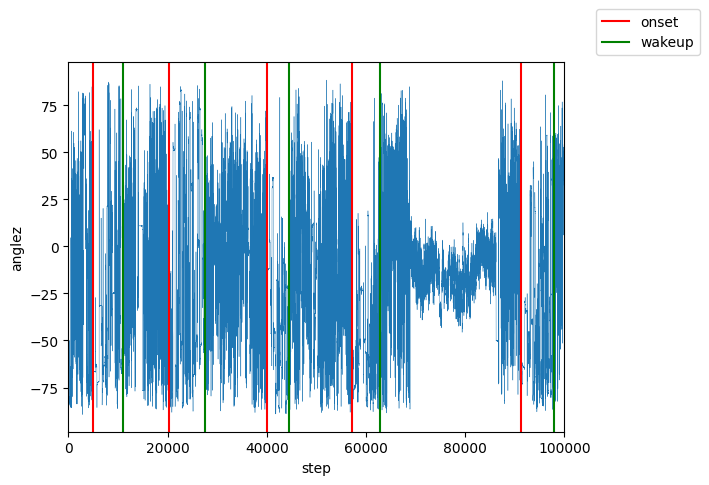

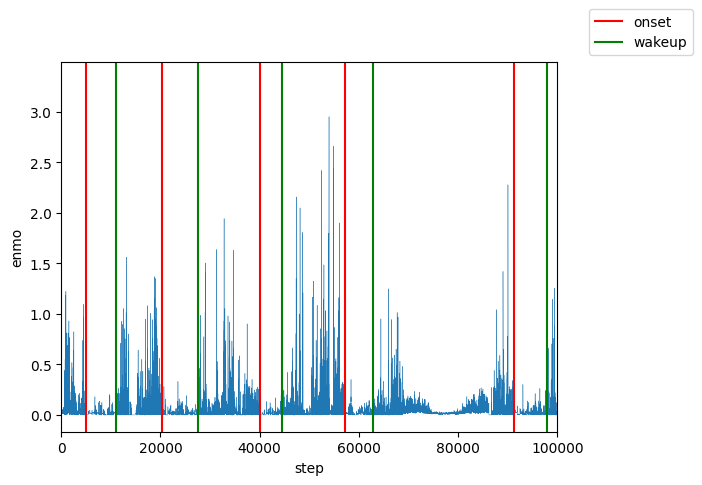

In [38]:
##desired range
step_range = [0,100000]

#plot anglez
plt.plot(df.step, df.anglez, lw=0.3)
for i in range(len(dfe)):
    if dfe.iloc[i].event == "onset":
        plt.axvline(dfe.iloc[i].step, color = "red", label = "onset")
    else:
        plt.axvline(dfe.iloc[i].step, color = "green", label = "wakeup")
plt.xlabel("step")
plt.ylabel("anglez")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0))
plt.xlim(step_range[0], step_range[1])
plt.show()

#plot enmo
plt.plot(df.step, df.enmo, lw=0.3)
for i in range(len(dfe)):
    if dfe.iloc[i].event == "onset":
        plt.axvline(dfe.iloc[i].step, color = "red", label = "onset")
    else:
        plt.axvline(dfe.iloc[i].step, color = "green", label = "wakeup")
plt.xlabel("step")
plt.ylabel("enmo")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1.0))
plt.xlim(step_range[0], step_range[1])
plt.show()